<a href="https://colab.research.google.com/github/MaxiPerrone/redes_neuronales/blob/main/3_Perceptron_limite_de_desicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn.datasets import load_iris

In [20]:
dataset = load_iris()

In [21]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns=dataset['feature_names'] + ['target'])

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [27]:
df['target'].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


In [28]:
df_reduced = df[['petal length (cm)', 'petal width (cm)', 'target']]
df_reduced = df_reduced.loc[df_reduced['target'].isin([0, 1])]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


In [29]:
X = df_reduced.drop('target', axis=1)
y = df_reduced['target'].copy()

In [34]:
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=1000, random_state=40)
model.fit(X, y)

Perceptron(random_state=40)

In [35]:
# visualizo los valores optimos de w1 y w2

model.coef_

array([[0.9, 1.3]])

In [32]:
# visualizo el valor optimo de b

model.intercept_

array([-3.])

Con los datos anteriores, tendriamos la funcion hipotesis del modelo de la siguiente manera:

*z(x) = x1 * w1 + x2 * w2 + b*

*= x1 * 0.9 + x2 * 1.3 + (-3)*

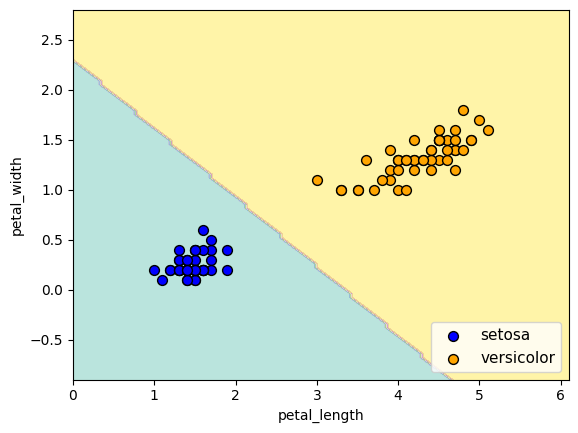

In [33]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap="Set3",
    alpha=0.6,
    xlabel="petal_length",
    ylabel="petal_width"
)

plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], c="blue", label="setosa", edgecolor="k", s=50)
plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], c="orange", label="versicolor", edgecolor="k", s=50)
plt.legend(loc="lower right", fontsize=11)
plt.show()

In [36]:
value = pd.DataFrame([[1,1]], columns=["petal length (cm)", "petal width (cm)"])

setosa_predict = model.predict(value)
setosa_predict

array([0.])

In [37]:
value = pd.DataFrame([[3,1.5]], columns=["petal length (cm)", "petal width (cm)"])

versicolor_predict = model.predict(value)
versicolor_predict

array([1.])

In [38]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X)
accuracy_score(y, y_predict)

1.0